# Set Up

## Generate Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#generate some data
#number of samples
N = 100
#dimensionality
D = 2
X = np.random.randn(N,D)
X[:50, :] = X[:50,:] - 2*np.ones((50,D))
X[50:, :] = X[50:,:] + 2*np.ones((50,D))

#generate some labels (i.e. target variable)
T = np.array([0]*50 + [1]*50)

#adding bias (intercept) term
ones = np.array([[1]*N]).T
Xb = np.concatenate((ones, X), axis=1)


## Initialize Model

In [2]:
#randomly initialize weight vector
w = np.random.randn(D + 1)

#model output
z = Xb.dot(w)

#add applying the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))
Y = sigmoid(z)


## Define Error Function

In [3]:
def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

## Gradient Descent

In [4]:
learning_rate = 0.1
print(cross_entropy(T, Y))
#100 iterations of gradient descent
for i in range(100):
    #print cross entropy error every 10 steps
    if i % 10 == 0:
        print(cross_entropy(T, Y))
    w += learning_rate * np.dot((T-Y).T, Xb)
    Y = sigmoid(Xb.dot(w))

print('Final w:', w)

34.753491135555834
34.753491135555834
0.017358087674050164
0.0171013808821983
0.016852571393046804
0.016611291420731738
0.01637719607979603
0.016149961609407015
0.015929283761360956
0.01571487633444055
0.015506469839842026
Final w: [-0.00750385  5.90228957  5.55817453]


# L2 Regularization

L2 regularization adds a penalty term to the cost function and shrinks weights closer to zero to reduce chance of overfitting.  The `l2` term (e.g. penalty) is usually between 0.1 - 1 but depends heavily on dataset.  This term can be treated as a hyperparameter.

Adding a regularization term to gradient descent.

In [5]:
#randomly initialize weight vector
w = np.random.randn(D + 1)

l2 = 0.1
learning_rate = 0.1

print(cross_entropy(T, Y))
#100 iterations of gradient descent
for i in range(100):
    #print cross entropy error every 10 steps
    if i % 10 == 0:
        print(cross_entropy(T, Y))
    w += learning_rate * (np.dot((T-Y).T, Xb) - l2*w)
    Y = sigmoid(Xb.dot(w))

print('Final w:', w)

0.01530381028412413
0.01530381028412413
2.1135647572453838e-05
6.059658035361467e-05
0.00015776571534102367
0.00037646207786523833
0.0008301286963331531
0.0017039388015873155
0.0032767656772812615
0.005937132210872916
0.010185763798209466
Final w: [-0.13013805  5.73632017  5.38726581]


Weights are much closer to zero.

# L1 Regularization

Instead of shrinking weights, L1 regularization helps with wide datasets where dimensionality is large in comparison to sample size.  The `l1` term defines the size of the penalty.

## Generataing a wide dataset

In [6]:
#generate some data
#number of samples
N = 50
#dimensionality
D = 50
X = (np.random.randn(N,D) - 0.5)*10

#lets make the target depend entirely on the first three dimensions
true_w = np.array([1, 0.5, -0.5] + [0]*(D-3))
Y = np.round(sigmoid(X.dot(true_w) + np.random.randn(N)*0.5))



## Gradient Descent

Including `l1` term.

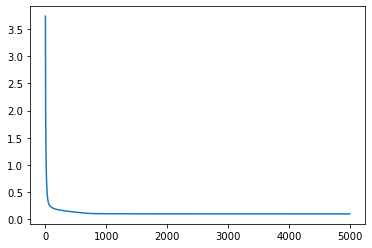

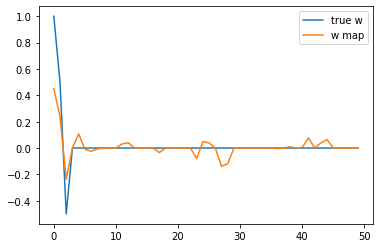

In [7]:
#randomly initialize weight vector
w = np.random.randn(D) / np.sqrt(D)

costs = []
learning_rate = 0.0001
l1 = 2.0

for t in range(5000):
    Yhat = sigmoid(X.dot(w))
    delta = Yhat - Y
    w = w - learning_rate*(X.T.dot(delta) + l1*np.sign(w))

    cost = -(Y*np.log(Yhat) + (1-Y)*np.log(1 - Yhat)).mean() + l1*np.abs(w).mean()
    costs.append(cost)

#plotting costs
plt.plot(costs)
plt.show()

#and plotting true w vs w from gradient descent
plt.plot(true_w, label='true w')
plt.plot(w, label='w map')
plt.legend()
plt.show()

The costs converge very quickly.  The weights are similar to the true weights, but there are still a few != 0 that should be zero.  Increasing the `l1` term and trying again.

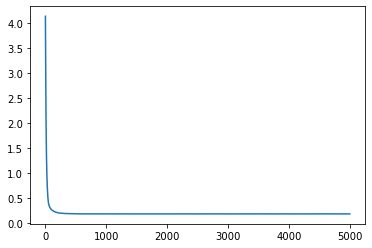

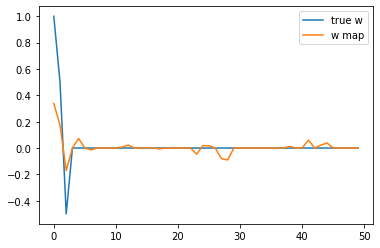

In [8]:
#randomly initialize weight vector
w = np.random.randn(D) / np.sqrt(D)

costs = []
learning_rate = 0.0001
l1 = 5.0

for t in range(5000):
    Yhat = sigmoid(X.dot(w))
    delta = Yhat - Y
    w = w - learning_rate*(X.T.dot(delta) + l1*np.sign(w))

    cost = -(Y*np.log(Yhat) + (1-Y)*np.log(1 - Yhat)).mean() + l1*np.abs(w).mean()
    costs.append(cost)

#plotting costs
plt.plot(costs)
plt.show()

#and plotting true w vs w from gradient descent
plt.plot(true_w, label='true w')
plt.plot(w, label='w map')
plt.legend()
plt.show()

# The Donut Problem

## Generate the donut data

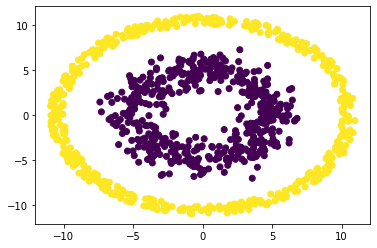

In [15]:
N = 1000
D = 2

R_inner = 5
R_outer = 10

R1 = np.random.randn(int(N/2)) + R_inner
theta = 2*np.pi*np.random.random(int(N/2))
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

R2 = np.random.rand(int(N/2)) + R_outer
theta = 2*np.pi*np.random.random(int(N/2))
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

X = np.concatenate([X_inner, X_outer])
T = np.array([0]*int(N/2) + [1]*int(N/2))

#take a look
plt.scatter(X[:,0], X[:,1], c=T)
plt.show()

This data is not linearly seperable, which is an assumption of applying logistic regression.

## Feature Engineering

In [16]:
#adding ones for a bias term (intercept)
ones = np.array([[1]*N]).T

#adding a new dimension which measures radius from center
r = np.zeros((N,1))
for i in range(N):
    r[i] = np.sqrt(X[i,:].dot(X[i,:]))

#adding bias term and radius var to X
Xb = np.concatenate((ones, r, X), axis=1)

## Train Logistic Regression

0 iteration:  1307.2164323815218
100 iteration:  0.1291676633416849


<ipython-input-3-a84ffd82f28f>:7: RuntimeWarning: divide by zero encountered in log
  E -= np.log(1 - Y[i])


200 iteration:  0.051771273938275
300 iteration:  0.04247996249070793
400 iteration:  0.040995559985710736
500 iteration:  0.041600230917652956
600 iteration:  0.04283105395906944
700 iteration:  0.044274094551653986
800 iteration:  0.04581089813821023
900 iteration:  0.04740825904115947
1000 iteration:  0.04905768060317279
1100 iteration:  0.05075771504775203
1200 iteration:  0.05250887287451807
1300 iteration:  0.054312199318763944
1400 iteration:  0.05616889120433314
1500 iteration:  0.05808019748834106
1600 iteration:  0.06004739395218886
1700 iteration:  0.06207177658264495
1800 iteration:  0.06415465957988994
1900 iteration:  0.06629737452484295
2000 iteration:  0.06850126984487785
2100 iteration:  0.0707677103488645
2200 iteration:  0.0730980767614461
2300 iteration:  0.07549376523116877
2400 iteration:  0.07795618680172191
2500 iteration:  0.08048676684103587
2600 iteration:  0.08308694442514972
2700 iteration:  0.085758171674587
2800 iteration:  0.08850191304131551
2900 iterat

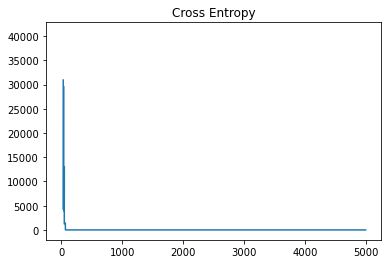

Final w: [-4.10620408e+01  4.83092357e+00 -2.40108618e-02  1.26425591e-02]
Final classification rate: 1.0


In [22]:
#initialize
w = np.random.rand(D+2)
error = []

learning_rate = 0.005
l1 = 0.01

for i in range(5000):
    Y = sigmoid(Xb.dot(w))
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 100 == 0:
        print(i, "iteration: ", e)
    
    #including L1 regularization term
    w += learning_rate * (np.dot((T - Y).T, Xb) - l1*w)
    
#visualizing error
plt.plot(error)
plt.title('Cross Entropy')
plt.show()

print('Final w:', w)
print('Final classification rate:', 1 - np.abs(T - np.round(Y)).sum() / N)


The final classification rate is nearly perfect and the L1 term forced the weights of the X and Y terms to zero as we expected, e.g. the final prediction does not depend on the initial X,Y coordinates at all, but rather entirely on the radius and bias terms.

# The XOR Problem

## Generate Some Data

This dataset is of the type XOR which means the target is true only when one of the Xs is true, but not both.

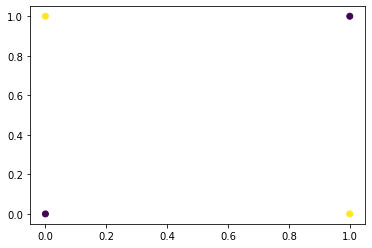

In [23]:
N = 4
D = 2

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
T = np.array([0, 1, 1, 0])

#visualizing data
plt.scatter(X[:,0], X[:,1], c=T)
plt.show()

As evidenced by the plot, there is no line that would separate the data.

## Feature Engineering

Adding a third dimension of multiplying x and y to allow the data to be separated by a plane.

In [24]:
#add bias term
ones = np.array([[1]*N]).T

#add 3rd dimension x*y
xy = np.matrix(X[:,0] * X[:,1]).T
Xb = np.array(np.concatenate((ones, xy, X), axis=1))

## Train Model

0 iteration:  4.058906793454819
100 iteration:  1.5591773214202194
200 iteration:  1.153783313559204
300 iteration:  0.9336845913842124
400 iteration:  0.8023545013138316
500 iteration:  0.71860656425127
600 iteration:  0.6625919977583559
700 iteration:  0.6238135885851389
800 iteration:  0.5962843903092517
900 iteration:  0.576375954295821
1000 iteration:  0.5617793284925143
1100 iteration:  0.5509666569899461
1200 iteration:  0.5428948679976195
1300 iteration:  0.5368339334866747
1400 iteration:  0.5322627666955312
1500 iteration:  0.5288036127385296
1600 iteration:  0.5261792779697421
1700 iteration:  0.5241844241817478
1800 iteration:  0.5226658183372923
1900 iteration:  0.5215084570902053
2000 iteration:  0.5206256481116438
2100 iteration:  0.5199518184532114
2200 iteration:  0.5194372399023689
2300 iteration:  0.5190441245834112
2400 iteration:  0.5187437136739107
2500 iteration:  0.5185140941230721
2600 iteration:  0.5183385539505632
2700 iteration:  0.5182043389238029
2800 iter

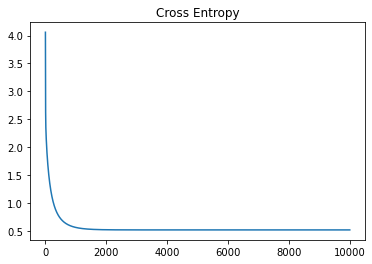

Final w: [-1.59308688 -8.07079816  3.61555934  3.61555934]
Final classification rate: 1.0


In [29]:
#initialize
w = np.random.rand(D+2)
error = []

learning_rate = 0.1
l1 = 0.01

for i in range(10000):
    Y = sigmoid(Xb.dot(w))
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 100 == 0:
        print(i, "iteration: ", e)
    
    #including L1 regularization term
    w += learning_rate * (np.dot((T - Y).T, Xb) - l1*w)
    
#visualizing error
plt.plot(error)
plt.title('Cross Entropy')
plt.show()

print('Final w:', w)
print('Final classification rate:', 1 - np.abs(T - np.round(Y)).sum() / N)